# Population Data Analysis

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data from cvs file

df = pd.read_csv("../DATA/countries_population_data.csv")
df.head()

,Country,Population,GDP_per_capita,Unemployment_rate,Area
0,United States,331002651,65298,6.10%,9629091
1,China,1439323776,16708,3.80%,9640011
2,Japan,126476461,39058,2.80%,377975
3,Germany,83783942,55803,3.20%,357022
4,United Kingdom,67886011,44177,4.80%,242500


In [3]:
# Create a copy of the data
df_copy = df.copy()

In [4]:
# Create second data frame
df_cities = pd.read_csv("../DATA/countries_data_capital_cities.csv")
df_cities.head()

,Country,Capital_City
0,United States,"Washington,D.C."
1,China,Beijing
2,Japan,Tokyo
3,Germany,Berlin
4,United Kingdom,London


In [5]:
# Merge the data frames

df_merged = df_copy.merge(df_cities, on='Country')
df_merged.head()

,Country,Population,GDP_per_capita,Unemployment_rate,Area,Capital_City
0,United States,331002651,65298,6.10%,9629091,"Washington,D.C."
1,China,1439323776,16708,3.80%,9640011,Beijing
2,Japan,126476461,39058,2.80%,377975,Tokyo
3,Germany,83783942,55803,3.20%,357022,Berlin
4,United Kingdom,67886011,44177,4.80%,242500,London


In [6]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            20 non-null     object
 1   Population         20 non-null     int64 
 2   GDP_per_capita     20 non-null     int64 
 3   Unemployment_rate  20 non-null     object
 4   Area               20 non-null     int64 
 5   Capital_City       20 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.1+ KB


In [7]:
# Sort the data frame by Population
df_merged.sort_values(by='Population', ascending=False, inplace=True)
df_merged.head()

,Country,Population,GDP_per_capita,Unemployment_rate,Area,Capital_City
1,China,1439323776,16708,3.80%,9640011,Beijing
16,India,1380004385,2252,6.10%,3287263,New Delhi
0,United States,331002651,65298,6.10%,9629091,"Washington,D.C."
17,Brazil,212559417,8711,13.90%,8515767,Brasília
18,Russia,145934460,11309,4.70%,17098242,Moscow


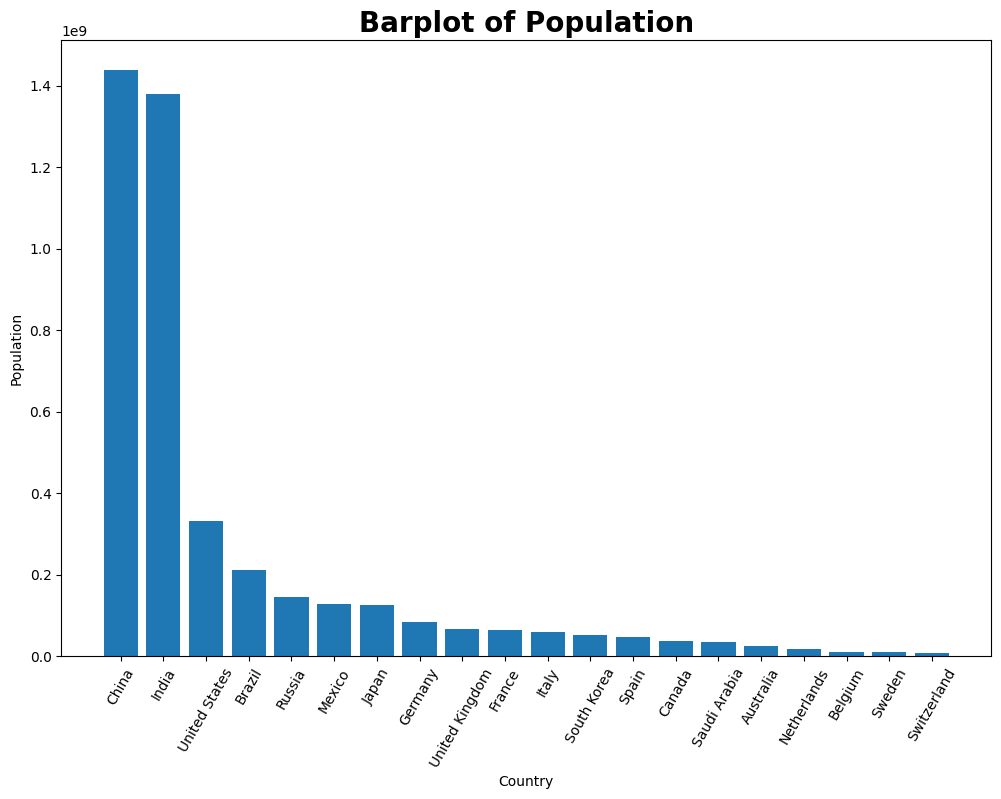

In [8]:
# Barplot of Population

fig,ax = plt.subplots(figsize=(12,8))
ax.bar(x=df_merged['Country'],
       height=df_merged['Population'])
ax.set(xlabel='Country', ylabel='Population')
plt.title(label="Barplot of Population",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.xticks(rotation= 60)
plt.show()

In [9]:
# Correlation between population and GDP per capita

population = df_merged['Population']
gdp_per_capita = df_merged['GDP_per_capita']

correlation = np.corrcoef(population,gdp_per_capita)
correlation

array([[ 1.        , -0.49159759],
       [-0.49159759,  1.        ]])

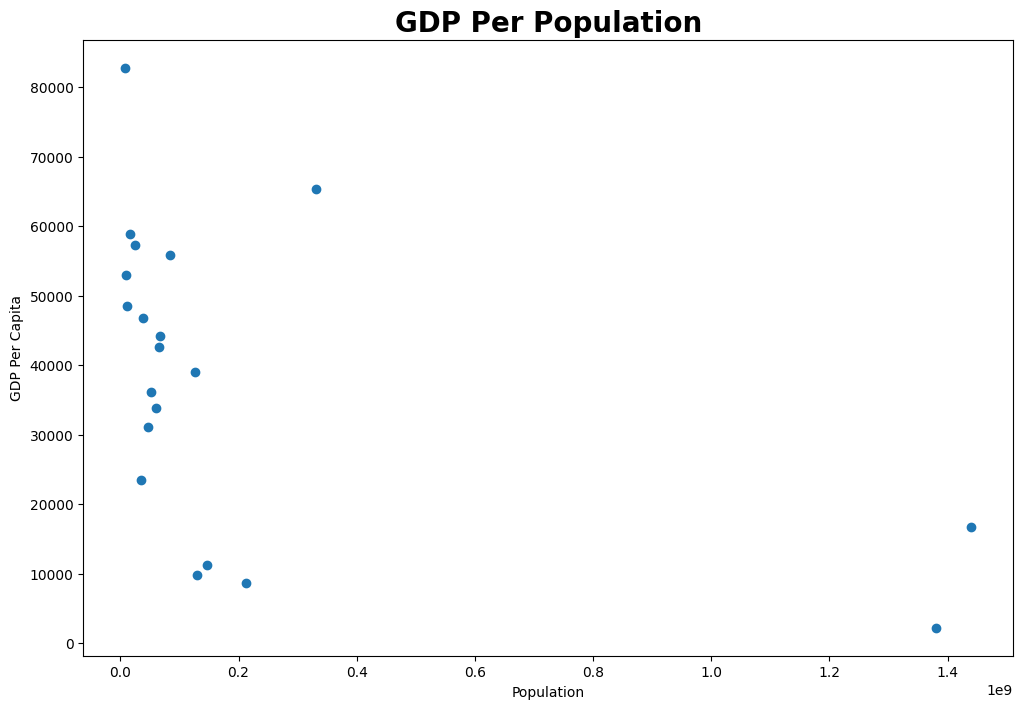

In [10]:
# Correlation plot between population and GDP per capita

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(x='Population',y='GDP_per_capita',data=df_merged)
ax.set(ylabel='GDP Per Capita', xlabel='Population')
plt.title(label="GDP Per Population",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

In [11]:
# Subset of top three lowest GDP per capita

# Sort the data by GDP per capita
df_merged.sort_values(by='GDP_per_capita', inplace=True)
# df_merged.head()

top_three_lowest_gdp = df_merged.head(3)
top_three_lowest_gdp

,Country,Population,GDP_per_capita,Unemployment_rate,Area,Capital_City
16,India,1380004385,2252,6.10%,3287263,New Delhi
17,Brazil,212559417,8711,13.90%,8515767,Brasília
10,Mexico,128932753,9877,3.60%,1964375,Mexico City


In [12]:
# Compare unemployment rates of Switzerland, China and USA

countries = ["Switzerland", "China", "United States"]

filtered_df = df_merged.query("Country==@countries")
filtered_df

,Country,Population,GDP_per_capita,Unemployment_rate,Area,Capital_City
1,China,1439323776,16708,3.80%,9640011,Beijing
0,United States,331002651,65298,6.10%,9629091,"Washington,D.C."
13,Switzerland,8654622,82792,2.50%,41285,Bern


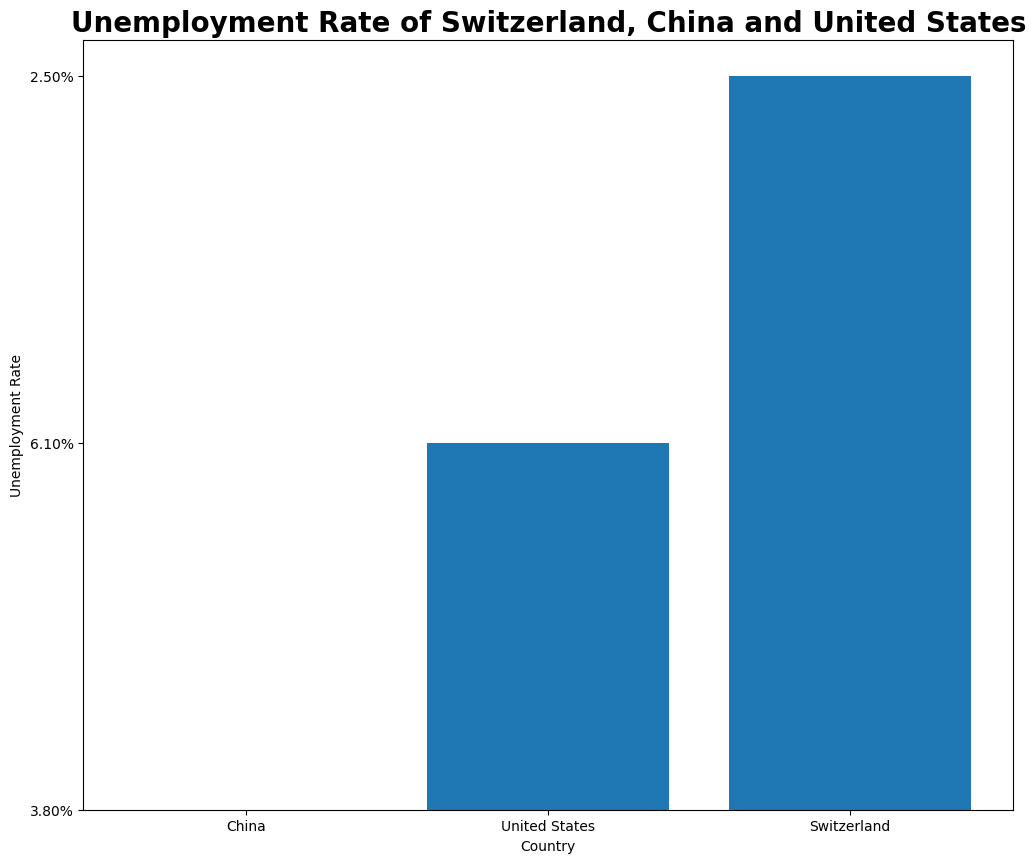

In [13]:
# Barplot of filtered_df

fig,ax = plt.subplots(figsize =(12,10))
ax.bar(x='Country', height='Unemployment_rate', data=filtered_df)
ax.set(ylabel='Unemployment Rate', xlabel='Country')
plt.title(label="Unemployment Rate of Switzerland, China and United States",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()